# Homework 3 - Kinetic Monte Carlo
Gabriel Fior

In this homework we are asked to perform a Kinectic Monte Carlo simulation to investigate the mobility $\mu$, and understand its dependence on the temperature $T$ and energetic disorder $\sigma$.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


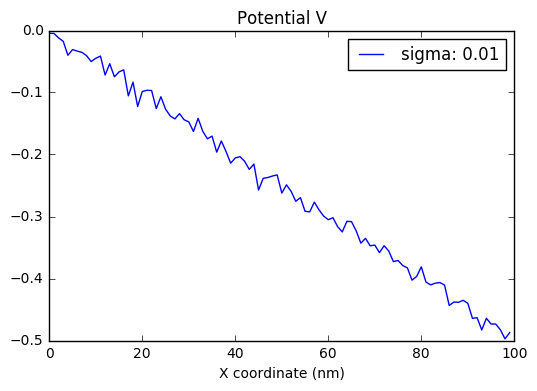

In [2]:
# 1D system
L = 100
x = np.arange(L) #in nm
E = 0.005 # V/nm - from 0.005 to 0.02
# In this case, E=1e-2 corresponds to 1e5 V/cm.
k = 8.617*1e-5 # in eV/K
#sigma = 0.01 #eV
e = 1
a0=1.e12
gamma=2. #1/nm
rij = x[1]-x[0] #distance between nodes

U=[]
r = np.random.normal(0.,sigma,L) # for storing a gaussian random number 
#print r.shape
U=[]
for i,j in enumerate(x):
    U.append((-1.*j*E) + r[i])  #in eV
 
U = np.array(U)            
plt.plot(x,U,label='sigma: '+str(sigma))
plt.title('Potential V')
plt.xlabel('X coordinate (nm)')
plt.gca()
#plt.ylim([-25,-22])
#plt.xlim([24,25])
plt.legend()
plt.show()

On the image above one can see what the potential looks like inside an organic semiconductor. We can understand that as a combination of a straight line and random fluctuations, which form these kind of steps.

Below we create a function to automate the process of creating potentials.

In [3]:
#Define function for potential
def create_potential(x,E,sigma,L):
    r = np.random.normal(0.,sigma,L) # for storing a gaussian random number 
    U= []
    for i,j in enumerate(x):
        U.append((-1.*j*E) + r[i])  #in eV
    return U

Below I wrote a function to perform the kinetic Monte Carlo simulation and return an array containing the electric field and the corresponding mobility $\mu$.

In [79]:
#Calculate rates
def do_MC_return_quants(temp1,list_elecFields,num_iters,sigma1):

    #num_iters = 100
    posx = 0
    rij = 1

    time1 = 0.
    list_pos=[]
    #list_mobs = []
    list_temps=[]
    #loop over energies
    #list_energies = np.linspace(0.002,0.1,10)

    list_mobs=[]
    
    for energy1 in list_elecFields: #energy corresponds to the value of electric
        #field for this loop
        U = create_potential(x,energy1,sigma1,L)
        kT = k*temp1
        for iter1 in range(num_iters):
            if posx==99 or posx==98: 
                break
            if posx==0 or posx==1: #if e- in left border, 
                #automatically moves it forward
                posx+=1
                continue
            #hopping options - left or right

            r2 =random.random()
            #print 'entered else'
            delta_energy_left = U[posx-1]-U[posx]
            delta_energy_right=U[posx+1]-U[posx]

            delta_energy_2left = U[posx-2]-U[posx]
            delta_energy_2right = U[posx+2]-U[posx]

            #print delta_energy_left,delta_energy_right
            #print prob_left,prob_right
            #print a0*np.exp(-2*gamma*rij)


            if delta_energy_right>0:
                prob_right = a0*np.exp(-2*gamma*rij)*np.exp(-delta_energy_right/(kT))
            else:
                prob_right=a0*np.exp(-2*gamma*rij)

            if delta_energy_left>0:
                prob_left = a0*np.exp(-2*gamma*rij)*np.exp(-delta_energy_left/kT)
            else:
                prob_left=a0*np.exp(-2*gamma*rij)

            if delta_energy_2left>0:
                prob_2left = a0*np.exp(-2*gamma*rij)*np.exp(-delta_energy_2left/kT)
            else:
                prob_2left=a0*np.exp(-2*gamma*rij)

            if delta_energy_2right>0:
                prob_2right = a0*np.exp(-2*gamma*rij)*np.exp(-delta_energy_2right/kT)
            else:
                prob_2right=a0*np.exp(-2*gamma*rij)


            a = prob_right + prob_left+prob_2left+prob_2right

            r1 = random.random()*a #num between [0,1]

            if r1<=prob_right:
                #hop right
                posx+=1
            elif r1>prob_right and r1<=(prob_right+prob_left):
                #hop left
                posx-=1
            elif r1>(prob_right+prob_left) and r1<=(prob_right+prob_left+prob_2left):
                #hop 2 left
                posx-=2
            else:
                #hop 2 right
                posx+=2

            #calculate time
            deltat = -np.log(r2)/a #in s, since [a] = [1/s]
            time1 += deltat
            list_pos.append([iter1,time1,posx])

        diff_position = (np.array((list_pos)[-1][-1] - np.array(list_pos)[0][-1]))
        time_elapsed = (np.array(list_pos)[-1][1])
        v = diff_position*1e-9/time_elapsed #velocity
        u = v/energy1 #mobility
        list_mobs.append([energy1,u])
        #list_temps.append(list_mobs)
    return list_mobs
#print v

Below I run the kinetic Monte Carlo 50 times for each value of sigma, in order to obtain a reasonably accurate value for the mobility. I rerun this simulation for different values of temperatures and sigma, so that we can investigate the effects of those on the mobility

In [76]:
# Do MC 50 times for T=200,sigma=0.001,num_iters=1000
energies_list = np.linspace(5.e-4,0.05,100)
temperatures = [200,400,500,700]
array_mobs10minus3 = np.zeros((len(temperatures),100,2))
array_mobs2minus2 = np.zeros((len(temperatures),100,2))
array_mobs4minus2 = np.zeros((len(temperatures),100,2))
array_mobs6minus2 = np.zeros((len(temperatures),100,2))

for index_temp,temp1 in enumerate(temperatures):
    for i in range(50):

        list_mobs_sigma_10minus3 = do_MC_return_quants(temp1,energies_list,500,1.e-3)
        list_mobs_sigma_2minus2 = do_MC_return_quants(temp1,energies_list,500,2.e-2)
        list_mobs_sigma_4minus2 = do_MC_return_quants(temp1,energies_list,500,4.e-2)
        list_mobs_sigma_6minus2 = do_MC_return_quants(temp1,energies_list,500,6.e-2)

        array_mobs10minus3[index_temp,:,:] += np.array(list_mobs_sigma_10minus3)
        array_mobs2minus2[index_temp,:,:] += np.array(list_mobs_sigma_2minus2)
        array_mobs4minus2[index_temp,:,:] += np.array(list_mobs_sigma_4minus2)
        array_mobs6minus2[index_temp,:,:] += np.array(list_mobs_sigma_6minus2)

    array_mobs10minus3[index_temp,:,:] /= 50.
    array_mobs2minus2[index_temp,:,:] /= 50.
    array_mobs4minus2[index_temp,:,:] /= 50.
    array_mobs6minus2[index_temp,:,:] /= 50.
#plt.plot(np.array(list_mobs2)[:,0],np.array(list_mobs2)[:,1])
#plt.show()

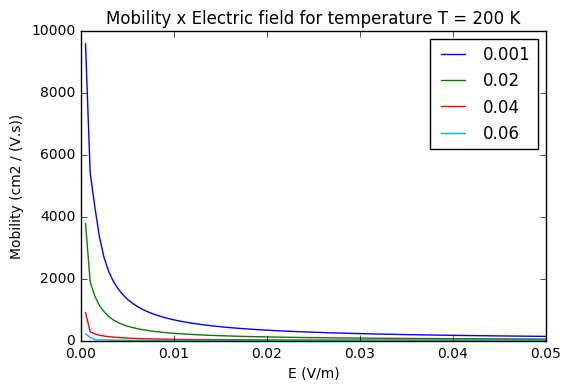

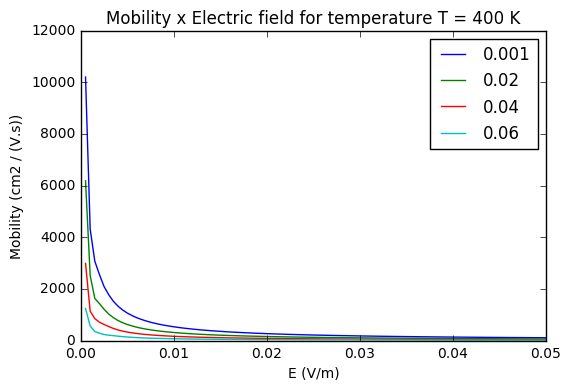

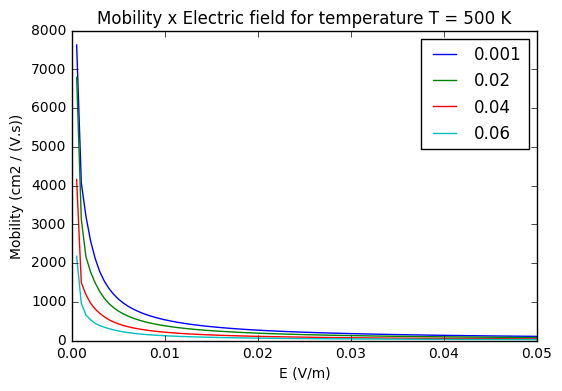

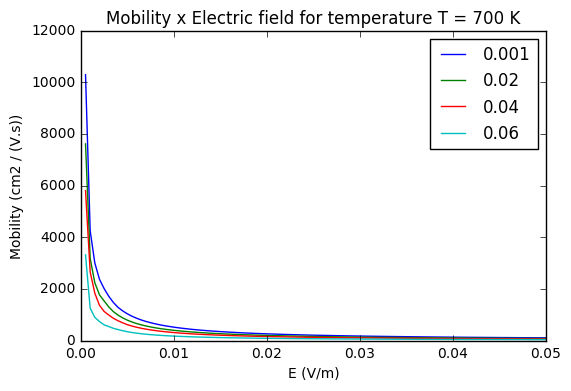

In [77]:
for j,temp1 in enumerate(temperatures):
    plt.figure(j)
    plt.title('Mobility x Electric field for temperature T = '+str(temp1) + ' K' )
    plt.ylabel('Mobility (cm2 / (V.s))')
    plt.xlabel('E (V/m)')
    plt.plot(array_mobs10minus3[j,:,0],array_mobs10minus3[j,:,1],label='0.001')
    plt.plot(array_mobs2minus2[j,:,0],array_mobs2minus2[j,:,1],label='0.02')
    plt.plot(array_mobs4minus2[j,:,0],array_mobs4minus2[j,:,1],label='0.04')
    plt.plot(array_mobs6minus2[j,:,0],array_mobs6minus2[j,:,1],label='0.06')
    plt.legend()

    plt.show()

On the images above, one can clearly see that, with increasing $\sigma$, the mobility decreases. This is expected, since the electron is more likely to hop back or in general to have its trajectory altered, if compared to the case with smaller $\sigma$.

Moreover, it is worth noting that, for the case with low temperature and low field (image on the top), the mobility decreases a lot. That is because the disorder dominates the electron propagation and tends to force the electron to be trapped in local minima and therefore unable to complete the whole path.

Since the electron can get trapped, the simulation is stopped before the end node is reached, since I added a stepping count which prevents the loop from executing too long. In this case, a very large time for the propagatio is estimated and the mobility has therefore a value close to 0.